In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.contrib.layers import fully_connected, convolution2d, flatten, batch_norm, max_pool2d, dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import keras
import os
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, TensorBoard
import tensorflow as tf

basedir = './OSDBC_workshop' # was . '..'
name = 'layer'
logs = os.path.join('.', 'tensorboard_logs')

# Fellows, Theano development stopped yesterday. RIP Theano! You are one of our first Deep Learning Toolkits!

#tbCallBack = TensorBoard(
#    log_dir=logs, histogram_freq=0, write_graph=True, write_images=True)
img_width, img_height = 48, 48
epochs = 10
batch_size = 50
# train_feature, train_target, validation_data=(test_feature, test_target)

emotions = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

num_classes = len(emotions)

nb_train_samples = 28698
nb_validation_samples = 3589

Using TensorFlow backend.


In [2]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling

test_datagen = ImageDataGenerator(rescale=1. / 255)


train_feature = os.path.join(basedir, 'data', 'raw', 'Training')
train_target = os.path.join(basedir, 'data', 'raw', 'Training')
test_feature = os.path.join(basedir, 'data', 'raw', 'PrivateTest')

# Folders need to exist
train_processed_images = os.path.join(basedir, 'data', 'processed', 'Training')
test_processed_images = os.path.join(basedir, 'data', 'processed',
                                     'PrivateTest')

# Use folders to get data and labels

# Set the train_generatorand validation_generator to categorical and it will one-hot encode your classes.

train_generator = train_datagen.flow_from_directory(
    directory=train_feature,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    save_to_dir=train_processed_images)

validation_generator = test_datagen.flow_from_directory(
    directory=test_feature,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    save_to_dir=test_processed_images)



Found 28698 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [7]:
def create_model():
    drop_rate = 0.0
    
    # create model
    model = Sequential()
    """
    Add layers
    """
    model.add(Convolution2D(32, 5, padding='same', activation='relu', input_shape=(img_width,img_width,1)))
    model.add(MaxPooling2D(padding='same'))
    model.add(Dropout(drop_rate))
    
    model.add(Convolution2D(32, 5, padding='same', activation='relu'))
    model.add(MaxPooling2D(padding='same'))
    model.add(Dropout(drop_rate))

    model.add(Convolution2D(32, 5, padding='same', activation='relu'))
    model.add(MaxPooling2D(padding='same'))
    model.add(Dropout(drop_rate))
    
    model.add(Flatten())
    
    model.add(Dense(32))
    model.add(Dense(num_classes, activation='softmax'))
    return model

my_model = create_model()

In [8]:
import time

filepath = "weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"

checkpoint = ModelCheckpoint(
    filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

tbCallBack = TensorBoard(
    log_dir=os.path.join('{}/{}'.format(logs, time.time())), histogram_freq=0, write_graph=True, write_images=True)

callbacks_list = [tbCallBack]

_loss = 'categorical_crossentropy'
_optimizer = 'adam'


my_model.compile(
    loss=_loss, optimizer=_optimizer, metrics=['accuracy'])

nn_history = my_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=callbacks_list,
    workers=4)

Epoch 1/10
573/573 [==============================] - 121s - loss: 1.6608 - acc: 0.3435 - val_loss: 1.5113 - val_acc: 0.4196
Epoch 2/10
573/573 [==============================] - 122s - loss: 1.4971 - acc: 0.4205 - val_loss: 1.4216 - val_acc: 0.4524
Epoch 3/10
573/573 [==============================] - 124s - loss: 1.4230 - acc: 0.4527 - val_loss: 1.3351 - val_acc: 0.4880
Epoch 4/10
573/573 [==============================] - 122s - loss: 1.3775 - acc: 0.4749 - val_loss: 1.3145 - val_acc: 0.4984
Epoch 5/10
573/573 [==============================] - 122s - loss: 1.3384 - acc: 0.4866 - val_loss: 1.2708 - val_acc: 0.5154
Epoch 6/10
573/573 [==============================] - 124s - loss: 1.3101 - acc: 0.4990 - val_loss: 1.2474 - val_acc: 0.5256
Epoch 7/10
573/573 [==============================] - 124s - loss: 1.2942 - acc: 0.5081 - val_loss: 1.2685 - val_acc: 0.5196
Epoch 8/10
573/573 [==============================] - 123s - loss: 1.2752 - acc: 0.5173 - val_loss: 1.2358 - val_acc: 0.5315


In [5]:
my_model.save_weights('first_try.h5')

In [45]:
!mkdir OSDBC_workshop/data/demo/1
!cp OSDBC_workshop/data/processed/PrivateTest/_1_3492.png OSDBC_workshop/data/demo/1/.

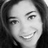

In [46]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
 
# mode.predict
img = load_img(os.path.join(basedir, 'data/demo/1/_1_3492.png'))
img


Found 1 images belonging to 1 classes.
Angry    -  0.09%
Disgust  -  0.01%
Fear     -  0.04%
Happy    - 99.27%
Sad      -  0.48%
Surprise -  0.02%
Neutral  -  0.09%


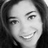

In [47]:
# !cp ../data/processed/PrivateTest/_1_3492.png .
# !pwd
demo_dir = os.path.join(basedir, 'data/demo')

demo_generator = test_datagen.flow_from_directory(
    directory=demo_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode='categorical',
    save_to_dir=test_processed_images)

predictions = my_model.predict_generator(demo_generator, steps=1)

for i, prediction in zip(emotions, predictions[0]):
    print('{emotion: <8} - {score:5.2f}%'.format(emotion=emotions[i], score=prediction*100))

img